In [1]:
"""
[分類モデル(classification model)または分類器(classifier)]
もっともよく知られた教師あり機械学習の応用例として, 分類モデルを構築するというのがある.

分類されたカテゴリーはクラス(class)と呼ばれる.
標本はクラスに属している, あるいはラベル(label)を持つ, どちらの表現も同様に用いられる.

[単項学習(one-class learning)]
単項学習では, トレーニングデータはただ1つのクラスから抽出した標本の集合である.
ゴールは, 標本がそのクラスに属するかどうかを予測するモデルを学習することである.
単項学習は, そのクラスの外側に属するトレーニングデータを見つけることが困難なときに役に立つ.
例えば予見されていないコンピュータネットワーク攻撃の検知のような, 異常検知器を作るときによく利用される.

[2項学習(two-class lerning)または2値分類(binary classification)]
2項学習では, トレーニング集合は, ちょうど2つのクラスから抽出された標本からなり(典型的には陽性と陰性), 目的は
2つのクラスを分離する境界を見つけることである.

多項学習(multi-class learning)とは, 3つ以上のクラスを互いに分離するための境界を見つける問題である.
"""
pass

In [ ]:
"""
トレーニングデータにおいての, それぞれの分類器の正確度(accuracy)は, 次の式で計算される.
正確度 = (新陽性 + 真隠性)/(真陽性 + 真陰性 + 偽陽性 + 偽陰性)

複雑な境界線を描きたければ, トレーニングデータの分類において, さらに正確な仕事をする分類器を得ることもできる.
しかし, モデルが複雑になればなるほど, その複雑なモデルをトレーニングデータに過剰適合の確率はより高くなる.

2つのクラスがだいたい同じサイズであるとき, 正確度というのは分類器を評価する合理的な方法である.
しかし大きなクラス不均衡があるときは, 正確度で分類器を評価するのはひどい方法である.
たとえば, あなたが0.1%の人々が発病し死に至る病をテストする分類器の評価を請け負ったと想像してみよう.
この場合の正確度というのは, 特に有用な統計であるとは限らない.
なぜなら, 単に全ての患者に対して陰性を宣言すれば, 正確度99.9%が達成されるのである.

幸運にも, クラス間に不均衡がある場合には, それを浮き彫りにする, 以下のような分類器の統計量がある.


感度= 真陽性/(真陽性+偽陰性)

特異度 = 真陰性/(真陰性+偽陽性)

陽性的中率 = 真陽性/(真陽性+偽陰性)

陰性的中率 = 真偽性/(真偽性+偽陰性)

"""
pass

In [74]:
def accuracy(truePos, falsePos, trueNeg, falseNeg):
    numerator = truePos + trueNeg
    denominator = truePos + trueNeg + falsePos + falseNeg
    return numerator/denominator

def sensitivity(truePos, falseNeg):
    try:
        return truePos/(truePos + falseNeg)
    except ZeroDivisionError:
        return float('nan')
    
def specificity(trueNeg, falsePos):
    try:
        return trueNeg/(trueNeg + falsePos)
    except ZeroDivisionError:
        return float('nan')

def posPredVal(truePos, falsePos):
    try:
        return truePos/(truePos + falsePos)
    except ZeroDivisionError:
        return float('nan')

def negPredVal(trueNeg, falseNeg):
    try:
        return trueNeg/(trueNeg + falseNeg)
    except ZeroDivisionError:
        return float('nan')

def getStats(truePos, falsePos, trueNeg, falseNeg, toPrint = True):
    accur = accuracy(truePos, falsePos, trueNeg, falseNeg)
    sens = sensitivity(truePos, falseNeg)
    spec = specificity(trueNeg, falsePos)
    ppv = posPredVal(truePos, falsePos)
    if toPrint:
        print(' Accuracy =', round(accur, 3))
        print(' Sensitivity =', round(sens, 3))
        print(' Specificity =', round(spec, 3))
        print(' Pos. Pred. Val. =', round(ppv, 3))
    return (accur, sens, spec, ppv)

In [76]:
# ランナーの性別予想
# ボストンマラソンデータの読み込み

def getBMData(filename):
    """Read CSV File. The elements are as followes.
    0. name, 1. gender, 2. age, 3. division(run or wheelchair), 4. country, 5. time
    return value: dictionary of the 6 value's list
    """
    data = {}
    f = open(filename)
    line = f.readline()
    data['name'], data['gender'], data['age'] = [], [], []
    data['division'], data['country'], data['time'] = [], [], []
    while line != '':
        split = line.split(',')
        data['name'].append(split[0])                                                                                                                                                                                                                 
        data['gender'].append(split[1])
        data['age'].append(split[2])
        data['division'].append(split[3])
        data['country'].append(split[4])
        data['time'].append(float(split[5][:-1])) # remove \n
        line = f.readline()
    f.close()
    return data

class Runner(object):
    def __init__(self, gender, age, time):
        self.featureVec = (int(age), float(time))
        self.label = gender
    
    def featureDist(self, other):
        """
        2人のランナーの特徴ベクトル間のユークリッド距離を返す
        """
        dist = 0.0
        for i in range(len(self.featureVec)):
            dist += abs(self.featureVec[i] - other.featureVec[i])**2
        return dist**0.5
      
    def getTime(self):
        return self.featureVec[1]
    
    def getAge(self):
        return self.featureVec[0]
    
    def getLabel(self):
        return self.label
    
    def getFeatures(self):
        return self.featureVec
    
    def __str__(self):
        return str(self.getAge()) + ', ' + str(self.getTime()) + ', ' + self.label

def buildMarathonExamples(fileName):
    data = getBMData(fileName)
    examples = []
    for i in range(len(data['age'])):
        a = Runner(data['gender'][i], data['age'][i], data['time'][i])
        examples.append(a)
    return examples

import numpy
import random

# 標本をトレーニングデータとテストデータに分ける
# 80%のデータをトレーニングデータとし, テストデータを残りの20%とする.
def divide80_20(examples):
    sampleIndices = random.sample(range(len(examples)), len(examples)//5)
    trainingSet, testSet = [], []
    for i in range(len(examples)):
        if i in sampleIndices:
            testSet.append(examples[i])
        else:
            trainingSet.append(examples[i])
    return trainingSet, testSet

In [8]:
"""
[k-近傍法(k-nearest neighbors, KNN)]
k-近傍法は, 分類アルゴリズムの中でおそらく最も簡単なものである.
「学習された」モデルはトレーニングデータそのものである.

k-近傍法の弱点は, 大きなクラス間不均衡があるときしばしば貧弱な結果を返すことである.
類似性に基づいてk-近傍の重み付けをするなど, もっと複雑な投票の仕組みを使うことによって問題は緩和されうる.
"""
pass

In [80]:
def findKNearest(example, exampleSet, k):
    kNearest, distances = [], []
    # 最初のk個の標本からなるリストと, それらのexampleの距離のリストを作る
    for i in range(k):
        kNearest.append(exampleSet[i])
        distances.append(example.featureDist(exampleSet[i]))
    maxDist = max(distances) # Get maximum distance
    # まだ考えられていないexampleSetの標本に対して
    for e in exampleSet[k:]:
        dist = example.featureDist(e)
        if dist < maxDist:
            # もっとも遠い距離にある標本を, 標本eで置き換える
            maxIndex = distances.index(maxDist)
            kNearest[maxIndex] = e
            distances[maxIndex] = dist
            maxDist = max (distances)
    return kNearest, distances

def KNearestClassify(training, testSet, label, k):
    """trainingとtestSetは標本のリスト, kは整数であるとする.
       testSetの標本が, 与えられたlabelをもつ標本なのかどうかを
       k-近傍分類器を使って予想する.
       真陽性, 偽陽性, 真偽性, 偽陰性の標本の数を返す.
    """
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for e in testSet:
        nearest, distances = findKNearest(e, training, k)
        # 投票を行う(多数決なので)
        numMatch = 0
        for i in range(len(nearest)):
            if nearest[i].getLabel() == label:
                numMatch += 1
        if numMatch > k//2: # 判断はラベルと同じ
            # 投票の結果, 陽性
            if e.getLabel() == label:
                truePos += 1
            else:
                falsePos += 1
        else: # 判断はラベルと異なる
            # 投票の結果, 陰性
            if e.getLabel() != label:
                trueNeg += 1
            else:
                falseNeg += 1
    return truePos, falsePos, trueNeg, falseNeg


In [86]:
import random
examples = buildMarathonExamples('bm_results2012.txt')
training, testSet = divide80_20(examples)
reducedTraining = random.sample(training, len(training)//10) # 処理時間が長くなるため, ダウンサンプリングする
truePos, falsePos, trueNeg, falseNeg = KNearestClassify(reducedTraining, testSet, 'M', 9)
getStats(truePos, falsePos, trueNeg, falseNeg)

"""
Accuracy: 正確度(陽性, 陰性適中率の合計に等しい)
Sensitivity: 実際に陽性の標本のうち, 陽性に分類された割合
Specificity: 実際に陰性の標本のうち, 陰性に分類された割合
Pos. Pred. Val: 陽性適中率(陽性に分類された標本のうち, 実際に陽性である割合)

大きなデータセットにk-近傍法を実際に運用するとき人々は, ダウンサンプルをする.
彼らは標本を構築することにおいてしばしば, ランダム選択より洗練された方法を用いる.
"""
pass

 Accuracy = 0.659
 Sensitivity = 0.724
 Specificity = 0.576
 Pos. Pred. Val. = 0.686


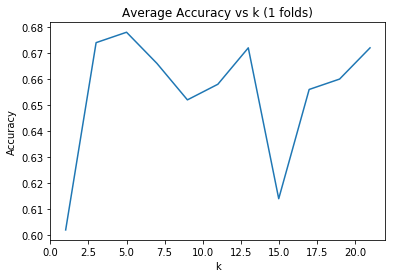

In [84]:
"""
上の実験ではkの値を9に設定した.
よいkを探すためのコードを使って, トレーニングデータからkを学び取った例が以下である.

[n-分割交差検証(n-fold cross-validation)]
numFolds回の繰り返しの中で, 新しいトレーニングデータ/テストデータのペアに分けられる.
そして, 新たなテストデータの正確度を, 新たなトレーニングデータを用いたk-近傍法で計算する.
内側のループを抜け出したたとき, numFolds分割の平均正確度を計算する.
"""

import pylab

def findK(training, minK, maxK, numFolds, label):
    # ある値の範囲の奇数kに対する平均正確度を計算する.
    accuracies = []
    for k in range(minK, maxK + 1, 2): # 奇数の値のみテスト(多数決が成立することを保証するため)
        score = 0.0
        for i in range(numFolds):
            # 計算時間を減らすためのダウンサンプル
            fold = random.sample(training, min(5000, len(training)))
            examples, testSet = divide80_20(fold)
            truePos, falsePos, trueNeg, falseNeg = KNearestClassify(reducedTraining, testSet, label, k)
            score += accuracy(truePos, falsePos, trueNeg, falseNeg)
        accuracies.append(score/numFolds)
    pylab.plot(range(minK, maxK + 1, 2), accuracies)
    pylab.title('Average Accuracy vs k (' + str(numFolds) + ' folds)')
    pylab.xlabel('k')
    pylab.ylabel('Accuracy')

findK(training, 1, 21, 1, 'M')
